In [80]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
import pandas as pd 
import numpy as np 
from glob import glob 
from fastcore.xtras import load_pickle
from scipy.stats import sem

import matplotlib.pyplot as plt

from gptchem.plotsettings import *
from gptchem.settings import (
    ONE_COL_GOLDEN_RATIO_HEIGHT_INCH,
    ONE_COL_WIDTH_INCH,
    TWO_COL_GOLDEN_RATIO_HEIGHT_INCH,
)

%matplotlib inline

In [82]:
all_res = glob("results_balanced/*.pkl")

In [83]:
gpr = pd.read_pickle('/Users/kevinmaikjablonka/git/kjappelbaum/gptchem/experiments/03_classification/photoswitch/xgboost_results.pkl')

In [84]:
all_cm_res = []
all_confident_res = []

for res in all_res:
    res = load_pickle(res)
    cm_all = res["cm_all"]
    cm_confident = res["cm_confident"]

    cm_all["num_classes"] = res["num_classes"]
    cm_all["num_train_points"] = res["num_train_points"]
    cm_all["representation"] = ", ".join(res["representation"])

    cm_confident["num_classes"] = res["num_classes"]
    cm_confident["num_train_points"] = res["num_train_points"]
    cm_confident["representation"] = ", ".join(res["representation"])
    cm_confident["frac_confident"] = sum(res["confident"]) / res["num_test_points"]

    all_cm_res.append(cm_all)
    all_confident_res.append(cm_confident)

In [85]:
res

{'num_classes': 2,
 'num_train_points': 20,
 'predictions': array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 1, 1],
        [0, 0, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 0, 1],
        [0, 0, 0],
        [0, 0, 0],
        [1, 1, 1],
        [1, 1, 1],
        [0, 1, 1],
        [1, 0, 0],
        [1, 1, 1],
        [0, 0, 1],
        [0, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [0, 1, 1],
        [1, 1, 1],
        [0, 1, 1],
        [0, 0, 0],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 0, 1],
        [0, 0, 1],
        [0, 1, 1],
        [0, 0, 0],
        [1, 1, 1],
        [1, 1, 1],
        [0, 0, 0],
        [1, 1, 1],
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0],
        [1, 1, 1],
        [1, 1, 1],
        [1, 0, 1],
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0],
        [1, 1, 1],
        [1, 1, 1],
        [0, 0, 0],
        [1

In [86]:
all_cm_res = pd.DataFrame(all_cm_res)
all_confident_res = pd.DataFrame(all_confident_res)

In [87]:
all_confident_res

,accuracy,acc_macro,racc,kappa,confusion_matrix,f1_macro,f1_micro,frac_valid,all_y_true,all_y_pred,valid_indices,might_have_rounded_floats,num_classes,num_train_points,representation,frac_confident
0,0.808511,0.808511,0.530557,0.592093,"((0, {0: 25, 1: 3}), (1, {0: 6, 1: 13}))",0.795157,0.808511,1.0,"[1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False,2,20,"SMILES, inchi, selfies",0.470000
1,0.813953,0.813953,0.625744,0.502890,"((0, {0: 6, 1: 8}), (1, {0: 0, 1: 29}))",0.739394,0.813953,1.0,"[1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, ...","[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False,2,20,"name, SMILES, inchi, selfies",0.632353
2,0.769231,0.907692,0.307692,0.666667,"((0, {0: 0, 1: 2, 2: 1, 3: 0, 4: 0}), (1, {0: ...",0.550000,0.769231,1.0,"[0, 4, 1, 3, 4, 4, 4, 0, 1, 4, 0, 4, 1]","[2, 4, 1, 3, 4, 4, 4, 1, 1, 4, 1, 4, 1]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",False,5,50,"name, SMILES, inchi, selfies",0.342105
3,0.917808,0.917808,0.504222,0.834217,"((0, {0: 30, 1: 4}), (1, {0: 2, 1: 37}))",0.917045,0.917808,1.0,"[1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, ...","[1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False,2,100,"SMILES, inchi, selfies",0.730000
4,0.818182,0.818182,0.586777,0.560000,"((0, {0: 7, 1: 2}), (1, {0: 0, 1: 2}))",0.770833,0.818182,1.0,"[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0]","[0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",False,2,10,"name, SMILES, inchi, selfies",0.141026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.750000,0.833333,0.312500,0.636364,"((0, {0: 2, 1: 2, 4: 0}), (1, {0: 0, 1: 2, 4: ...",0.777778,0.750000,1.0,"[0, 1, 0, 4, 1, 4, 0, 0]","[0, 1, 1, 4, 1, 4, 0, 1]","[0, 1, 2, 3, 4, 5, 6, 7]",False,5,20,"name, SMILES, inchi, selfies",0.117647
57,0.756757,0.902703,0.216216,0.689655,"((0, {0: 7, 1: 3, 2: 0, 3: 0, 4: 0}), (1, {0: ...",0.730918,0.756757,1.0,"[2, 3, 0, 1, 2, 0, 0, 4, 3, 1, 2, 4, 1, 4, 0, ...","[3, 4, 0, 1, 3, 0, 1, 4, 3, 1, 2, 4, 1, 4, 0, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False,5,100,"SMILES, inchi, selfies",0.370000
58,0.800000,0.900000,0.280000,0.722222,"((0, {0: 1, 1: 2, 3: 0, 4: 0}), (1, {0: 0, 1: ...",0.791667,0.800000,1.0,"[0, 0, 3, 4, 4, 4, 4, 1, 1, 0]","[0, 1, 3, 4, 4, 4, 4, 1, 1, 1]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",False,5,50,"name, SMILES, inchi, selfies",0.263158
59,0.888889,0.888889,0.499619,0.777947,"((0, {0: 37, 1: 3}), (1, {0: 6, 1: 35}))",0.888821,0.888889,1.0,"[1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, ...","[1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False,2,200,"SMILES, inchi, selfies",0.810000


In [88]:
all_cm_res_grouped = (
    all_cm_res[
        [
            "num_classes",
            "representation",
            "num_train_points",
            "accuracy",
            "kappa",
            "f1_macro",
            "f1_micro",
        ]
    ]
    .groupby(["num_classes", "representation", "num_train_points"])
    .agg(["mean", "std", sem])
)
all_confident_res_grouped = (
    all_confident_res[
        [
            "num_classes",
            "representation",
            "num_train_points",
            "frac_confident",
            "accuracy",
            "kappa",
            "f1_macro",
            "f1_micro",
        ]
    ]
    .groupby(["num_classes", "representation", "num_train_points"])
    .agg(["mean", "std", sem])
)

In [89]:
all_cm_res_grouped

accuracy            \
                                                               mean       std   
num_classes representation               num_train_points                       
2           SMILES, inchi, selfies       10                0.730000  0.095568   
                                         20                0.770000  0.035590   
                                         50                0.842500  0.009574   
                                         100               0.850000  0.021602   
                                         200               0.862500  0.018930   
            name, SMILES, inchi, selfies 10                0.714744  0.077190   
                                         20                0.783088  0.025115   
                                         50                0.835526  0.033113   
5           SMILES, inchi, selfies       10                0.322500  0.038622   
                                         20                0.426667  0.092916   
                                         50                0.460000  0.062183   
                                         100               0.546667  0.030551   
                                         200               0.710000  0.030000   
            name, SMILES, inchi, selfies 10                0.317308  0.030294   
                                         20                0.393382  0.084372   
                                         50                0.532895  0.065789   

                                                                        kappa  \
                                                                sem      mean   
num_classes representation               num_train_points                       
2           SMILES, inchi, selfies       10                0.047784  0.460000   
                                         20                0.017795  0.540000   
                                         50                0.004787  0.685000   
                                         100               0.010801  0.700000   
                                         200               0.009465  0.725000   
            name, SMILES, inchi, selfies 10                0.038595  0.429487   
                                         20                0.012558  0.566176   
                                         50                0.016557  0.671053   
5           SMILES, inchi, selfies       10                0.019311  0.147186   
                                         20                0.053645  0.280416   
                                         50                0.031091  0.323413   
                                         100               0.017638  0.431272   
                                         200               0.017321  0.636016   
            name, SMILES, inchi, selfies 10                0.015147  0.143083   
                                         20                0.042186  0.237070   
                                         50                0.032895  0.415769   

                                                                               \
                                                                std       sem   
num_classes representation               num_train_points                       
2           SMILES, inchi, selfies       10                0.191137  0.095568   
                                         20                0.071181  0.035590   
                                         50                0.019149  0.009574   
                                         100               0.043205  0.021602   
                                         200               0.037859  0.018930   
            name, SMILES, inchi, selfies 10                0.154379  0.077190   
                                         20                0.050230  0.025115   
                                         50                0.066227  0.033113   
5           SMILES, inchi, selfies       10                0.051396  0.025698   
       

In [90]:
all_confident_res_grouped

frac_confident  \
                                                                    mean   
num_classes representation               num_train_points                  
2           SMILES, inchi, selfies       10                     0.592500   
                                         20                     0.645000   
                                         50                     0.770000   
                                         100                    0.770000   
                                         200                    0.822500   
            name, SMILES, inchi, selfies 10                     0.339744   
                                         20                     0.555147   
                                         50                     0.703947   
5           SMILES, inchi, selfies       10                     0.147500   
                                         20                     0.180000   
                                         50                     0.322500   
                                         100                    0.386667   
                                         200                    0.483333   
            name, SMILES, inchi, selfies 10                     0.035256   
                                         20                     0.073529   
                                         50                     0.236842   

                                                                               \
                                                                std       sem   
num_classes representation               num_train_points                       
2           SMILES, inchi, selfies       10                0.115866  0.057933   
                                         20                0.125033  0.062517   
                                         50                0.014142  0.007071   
                                         100               0.032660  0.016330   
                                         200               0.015000  0.007500   
            name, SMILES, inchi, selfies 10                0.202033  0.101017   
                                         20                0.060485  0.030243   
                                         50                0.136530  0.068265   
5           SMILES, inchi, selfies       10                0.092871  0.046435   
                                         20                0.040000  0.023094   
                                         50                0.088081  0.044041   
                                         100               0.015275  0.008819   
                                         200               0.023094  0.013333   
            name, SMILES, inchi, selfies 10                0.028428  0.014214   
                                         20                0.036022  0.018011   
                                         50                0.098465  0.049232   

                                                           accuracy            \
                                                               mean       std   
num_classes representation               num_train_points                       
2           SMILES, inchi, selfies       10                0.830725  0.076224   
                                         20                0.861716  0.055214   
                                         50                0.902616  0.006929   
                                         100               0.921972  0.021465   
                                         200               0.920861  0.021846   
            name, SMILES, inchi, selfies 10                0.812069  0.116961   
                                         20                0.883627  0.049013   
                                         50                0.901123  0.066348   
5           SMILES, inchi, selfies       10                0.314723  0.225858   
                                         20                0.640212  0.138908   
                    

In [91]:
gpt = pd.read_pickle("../03_classification/photoswitch/results.pkl")

In [92]:
gpt

frac_valid            accuracy  \
                                            mean  std  sem      mean   
num_classes representation train_size                                  
2           SMILES         10                1.0  0.0  0.0  0.663077   
                           20                1.0  0.0  0.0  0.738182   
                           50                1.0  0.0  0.0  0.809167   
                           100               1.0  0.0  0.0  0.860909   
                           200               1.0  0.0  0.0  0.872500   
            inchi          10                1.0  0.0  0.0  0.580000   
                           20                1.0  0.0  0.0  0.790000   
                           50                1.0  0.0  0.0  0.817273   
                           100               1.0  0.0  0.0  0.835455   
                           200               1.0  0.0  0.0  0.856364   
            name           10                1.0  0.0  0.0  0.749663   
                           20                1.0  0.0  0.0  0.837010   
                           50                1.0  0.0  0.0  0.858726   
            selfies        10                1.0  0.0  0.0  0.590769   
                           20                1.0  0.0  0.0  0.700000   
                           50                1.0  0.0  0.0  0.766000   
                           100               1.0  0.0  0.0  0.831818   
                           200               1.0  0.0  0.0  0.847000   
5           SMILES         10                1.0  0.0  0.0  0.243000   
                           20                1.0  0.0  0.0  0.305556   
                           50                1.0  0.0  0.0  0.482222   
                           100               1.0  0.0  0.0  0.546250   
                           200               1.0  0.0  0.0  0.594444   
            inchi          10                1.0  0.0  0.0  0.320909   
                           20                1.0  0.0  0.0  0.410000   
                           50                1.0  0.0  0.0  0.464444   
                           100               1.0  0.0  0.0  0.522500   
                           200               1.0  0.0  0.0  0.584444   
            name           10                1.0  0.0  0.0  0.338608   
                           20                1.0  0.0  0.0  0.431373   
                           50                1.0  0.0  0.0  0.470395   
            selfies        10                1.0  0.0  0.0  0.260000   
                           20                1.0  0.0  0.0  0.331250   
                           50                1.0  0.0  0.0  0.445000   
                           100               1.0  0.0  0.0  0.510000   
                           200               1.0  0.0  0.0  0.562222   

                                                           f1_macro            \
                                            std       sem      mean       std   
num_classes representation train_size                                           
2           SMILES         10          0.056772  0.015746  0.641876  0.077671   
                           20          0.065699  0.019809  0.730227  0.073320   
                           50          0.044202  0.012760  0.808074  0.045029   
                           100         0.027370  0.008252  0.860459  0.027379   
                           200         0.033063  0.009545  0.872218  0.033372   
            inchi          10          0.084656  0.023479  0.528971  0.132754   
                           20          0.033466  0.010090  0.786820  0.034876   
                           50          0.023277  0.007018  0.816229  0.023690   
                           100         0.042039  0.012675  0.834967  0.042151   
                           200         0.035291  0.010641  0.856221  0.035327   
            name           10          0.103054  0.018218  0.735287  0.134059   
                           20          0.045417  0.013111  0.835383  0.046279   
              

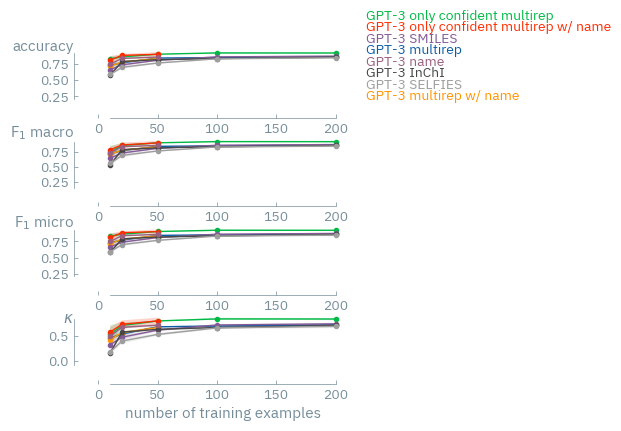

In [93]:
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH * 2, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH * 2))


for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
    ax[i].plot(
        all_cm_res_grouped.loc[2, "SMILES, inchi, selfies", :][metric]["mean"].index,
        all_cm_res_grouped.loc[2, "SMILES, inchi, selfies", :][metric]["mean"].values,
        label="GPT-3 multirep",
        marker="o",
    )

    ax[i].fill_between(
        all_cm_res_grouped.loc[2, "SMILES, inchi, selfies", :][metric]["mean"].index,
        all_cm_res_grouped.loc[2, "SMILES, inchi, selfies", :][metric]["mean"].values
        - all_cm_res_grouped.loc[2, "SMILES, inchi, selfies", :][metric]["sem"].values,
        all_cm_res_grouped.loc[2, "SMILES, inchi, selfies", :][metric]["mean"].values
        + all_cm_res_grouped.loc[2, "SMILES, inchi, selfies", :][metric]["sem"].values,
        alpha=0.2,
    )

    ax[i].plot(
        all_confident_res_grouped.loc[2, "SMILES, inchi, selfies", :][metric]["mean"].index,
        all_confident_res_grouped.loc[2, "SMILES, inchi, selfies", :][metric]["mean"].values,
        label="GPT-3 only confident multirep",
        marker="o",
    )

    ax[i].fill_between(
        all_confident_res_grouped.loc[2, "SMILES, inchi, selfies", :][metric]["mean"].index,
        all_confident_res_grouped.loc[2, "SMILES, inchi, selfies", :][metric]["mean"].values
        - all_confident_res_grouped.loc[2, "SMILES, inchi, selfies", :][metric]["sem"].values,
        all_confident_res_grouped.loc[2, "SMILES, inchi, selfies", :][metric]["mean"].values
        + all_confident_res_grouped.loc[2, "SMILES, inchi, selfies", :][metric]["sem"].values,
        alpha=0.2,
    )

    ax[i].plot(
        all_cm_res_grouped.loc[2, "name, SMILES, inchi, selfies", :][metric]["mean"].index,
        all_cm_res_grouped.loc[2, "name, SMILES, inchi, selfies", :][metric]["mean"].values,
        label="GPT-3 multirep w/ name",
        marker="o",
    )

    ax[i].fill_between(
        all_cm_res_grouped.loc[2, "name, SMILES, inchi, selfies", :][metric]["mean"].index,
        all_cm_res_grouped.loc[2, "name, SMILES, inchi, selfies", :][metric]["mean"].values
        - all_cm_res_grouped.loc[2, "name, SMILES, inchi, selfies", :][metric]["sem"].values,
        all_cm_res_grouped.loc[2, "name, SMILES, inchi, selfies", :][metric]["mean"].values
        + all_cm_res_grouped.loc[2, "name, SMILES, inchi, selfies", :][metric]["sem"].values,
        alpha=0.2,
    )

    ax[i].plot(
        all_confident_res_grouped.loc[2, "name, SMILES, inchi, selfies", :][metric]["mean"].index,
        all_confident_res_grouped.loc[2, "name, SMILES, inchi, selfies", :][metric]["mean"].values,
        label="GPT-3 only confident multirep w/ name",
        marker="o",
    )

    ax[i].fill_between(
        all_confident_res_grouped.loc[2, "name, SMILES, inchi, selfies", :][metric]["mean"].index,
        all_confident_res_grouped.loc[2, "name, SMILES, inchi, selfies", :][metric]["mean"].values
        - all_confident_res_grouped.loc[2, "name, SMILES, inchi, selfies", :][metric]["sem"].values,
        all_confident_res_grouped.loc[2, "name, SMILES, inchi, selfies", :][metric]["mean"].values
        + all_confident_res_grouped.loc[2, "name, SMILES, inchi, selfies", :][metric]["sem"].values,
        alpha=0.2,
    )

    ax[i].plot(
        gpt.loc[2, "SMILES", :][metric]["mean"].index,
        gpt.loc[2, "SMILES", :][metric]["mean"].values,
        label="GPT-3 SMILES",
        marker="o",
    )

    ax[i].fill_between(
        gpt.loc[2, "SMILES", :][metric]["mean"].index,
        gpt.loc[2, "SMILES", :][metric]["mean"].values
        - gpt.loc[2, "SMILES", :][metric]["sem"].values,
        gpt.loc[2, "SMILES", :][metric]["mean"].values
        + gpt.loc[2, "SMILES", :][metric]["sem"].values,
        alpha=0.2,
    )

    ax[i].plot(
        gpt.loc[2, "inchi", :][metric]["mean"].index,
        gpt.loc[2, "inchi", :][metric]["mean"].values,
        label="GPT-3 InChI",
        marker="o",
    )

    ax[i].fill_between(
        gpt.loc[2, "inchi", :][metric]["mean"].index,
        gpt.loc[2, "inchi", :][metric]["mean"].values
        - gpt.loc[2, "inchi", :][metric]["sem"].values,
        gpt.loc[2, "inchi", :][metric]["mean"].values
        + gpt.loc[2, "inchi", :][metric]["sem"].values,
        alpha=0.2,
    )

    ax[i].plot(
        gpt.loc[2, "selfies", :][metric]["mean"].index,
        gpt.loc[2, "selfies", :][metric]["mean"].values,
        label="GPT-3 SELFIES",
        marker="o",
    )

    ax[i].fill_between(
        gpt.loc[2, "selfies", :][metric]["mean"].index,
        gpt.loc[2, "selfies", :][metric]["mean"].values
        - gpt.loc[2, "selfies", :][metric]["sem"].values,
        gpt.loc[2, "selfies", :][metric]["mean"].values
        + gpt.loc[2, "selfies", :][metric]["sem"].values,
        alpha=0.2,
    )

    ax[i].plot(
        gpt.loc[2, "name", :][metric]["mean"].index,
        gpt.loc[2, "name", :][metric]["mean"].values,
        label="GPT-3 name",
        marker="o",
    )

    ax[i].fill_between(
        gpt.loc[2, "name", :][metric]["mean"].index,
        gpt.loc[2, "name", :][metric]["mean"].values - gpt.loc[2, "name", :][metric]["sem"].values,
        gpt.loc[2, "name", :][metric]["mean"].values + gpt.loc[2, "name", :][metric]["sem"].values,
        alpha=0.2,
    )

    range_frame(
        ax[i],
        np.array([10, 200]),
        np.array(
            [
                all_confident_res_grouped[metric]["mean"].values.min(),
                all_cm_res_grouped[metric]["mean"].values.min(),
                all_confident_res_grouped[metric]["mean"].values.max(),
                all_cm_res_grouped[metric]["mean"].values.max(),
            ]
        ),
    )


ylabel_top("accuracy", ax[0], x_pad=0.04, y_pad=0.08)
ylabel_top(r"F$_1$ macro", ax[1], x_pad=0.04, y_pad=0.08)
ylabel_top(r"F$_1$ micro", ax[2], x_pad=0.04, y_pad=0.08)
ylabel_top(r"$\kappa$", ax[3], x_pad=0.04, y_pad=0.08)

matplotx.line_labels(ax[0])
# ylabel_top('accuracy')
ax[-1].set_xlabel("number of training examples")

fig.tight_layout()
plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)
fig.savefig("metrics.pdf", bbox_inches="tight")

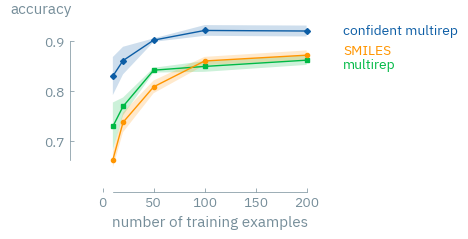

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(ONE_COL_WIDTH_INCH, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH))



ax.plot(
    all_confident_res_grouped.loc[2, "SMILES, inchi, selfies", :]["accuracy"]["mean"].index,
    all_confident_res_grouped.loc[2, "SMILES, inchi, selfies", :]["accuracy"]["mean"].values,
    label="confident multirep",
    marker="D",
)

ax.fill_between(
    all_confident_res_grouped.loc[2, "SMILES, inchi, selfies", :]["accuracy"]["mean"].index,
    all_confident_res_grouped.loc[2, "SMILES, inchi, selfies", :]["accuracy"]["mean"].values
    - all_confident_res_grouped.loc[2, "SMILES, inchi, selfies", :]["accuracy"]["sem"].values,
    all_confident_res_grouped.loc[2, "SMILES, inchi, selfies", :]["accuracy"]["mean"].values
    + all_confident_res_grouped.loc[2, "SMILES, inchi, selfies", :]["accuracy"]["sem"].values,
    alpha=0.2,
)



ax.plot(
    all_cm_res_grouped.loc[2, "SMILES, inchi, selfies", :]["accuracy"]["mean"].index,
    all_cm_res_grouped.loc[2, "SMILES, inchi, selfies", :]["accuracy"]["mean"].values,
    label="multirep",
    marker="s",
)

ax.fill_between(
    all_cm_res_grouped.loc[2, "SMILES, inchi, selfies", :]["accuracy"]["mean"].index,
    all_cm_res_grouped.loc[2, "SMILES, inchi, selfies", :]["accuracy"]["mean"].values
    - all_cm_res_grouped.loc[2, "SMILES, inchi, selfies", :]["accuracy"]["sem"].values,
    all_cm_res_grouped.loc[2, "SMILES, inchi, selfies", :]["accuracy"]["mean"].values
    + all_cm_res_grouped.loc[2, "SMILES, inchi, selfies", :]["accuracy"]["sem"].values,
    alpha=0.2,
)


ax.plot(
    gpt.loc[2, "SMILES", :]["accuracy"]["mean"].index,
    gpt.loc[2, "SMILES", :]["accuracy"]["mean"].values,
    label="SMILES",
    marker="o",
)

ax.fill_between(
    gpt.loc[2, "SMILES", :]["accuracy"]["mean"].index,
    gpt.loc[2, "SMILES", :]["accuracy"]["mean"].values - gpt.loc[2, "SMILES", :]["accuracy"]["sem"].values,
    gpt.loc[2, "SMILES", :]["accuracy"]["mean"].values + gpt.loc[2, "SMILES", :]["accuracy"]["sem"].values,
    alpha=0.2,
)


# ax.plot(
#     gpr.loc[2]["accuracy"]["mean"].index,
#     gpr.loc[2]["accuracy"]["mean"].values,
#     label="GPR",
#     marker="o",
# )

# ax.plot(
#     gpt.loc[2, "name", :][metric]["mean"].index,
#     gpt.loc[2, "name", :][metric]["mean"].values,
#     label="name",
#     marker="o",
# )

# ax.fill_between(
#     gpt.loc[2, "name", :][metric]["mean"].index,
#     gpt.loc[2, "name", :][metric]["mean"].values - gpt.loc[2, "name", :][metric]["sem"].values,
#     gpt.loc[2, "name", :][metric]["mean"].values + gpt.loc[2, "name", :][metric]["sem"].values,
#     alpha=0.2,
# )

# ax.set_xscale("log")

range_frame(
    ax,
    np.array([10, 200]),
    np.array(
        [
            all_confident_res_grouped.loc[2, "name, SMILES, inchi, selfies", :]["accuracy"][
                "mean"
            ].values.min(),
            all_cm_res_grouped.loc[2, "name, SMILES, inchi, selfies", :]["accuracy"][
                "mean"
            ].values.min(),
            all_confident_res_grouped.loc[2, "name, SMILES, inchi, selfies", :]["accuracy"][
                "mean"
            ].values.max(),
            all_cm_res_grouped.loc[2, "name, SMILES, inchi, selfies", :]["accuracy"][
                "mean"
            ].values.max(),
            gpt.loc[2, "SMILES", :]["accuracy"]["mean"].values.min(),
            gpt.loc[2, "name", :]["accuracy"]["mean"].values.min(),
            gpt.loc[2, "SMILES", :]["accuracy"]["mean"].values.max(),
            gpt.loc[2, "name", :]["accuracy"]["mean"].values.max(),
        ]
    ),
    pad=0.15,
)


matplotx.line_labels(ax)

ax.set_xlabel("number of training examples")

ylabel_top("accuracy", y_pad=0.06, x_pad=0.03)

fig.savefig("accuracy_multirep.pdf", bbox_inches="tight")

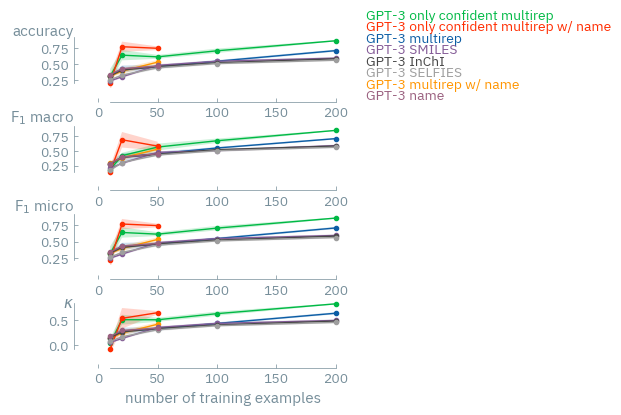

In [95]:
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH * 2, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH * 2))


for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
    ax[i].plot(
        all_cm_res_grouped.loc[5, "SMILES, inchi, selfies", :][metric]["mean"].index,
        all_cm_res_grouped.loc[5, "SMILES, inchi, selfies", :][metric]["mean"].values,
        label="GPT-3 multirep",
        marker="o",
    )

    ax[i].fill_between(
        all_cm_res_grouped.loc[5, "SMILES, inchi, selfies", :][metric]["mean"].index,
        all_cm_res_grouped.loc[5, "SMILES, inchi, selfies", :][metric]["mean"].values
        - all_cm_res_grouped.loc[5, "SMILES, inchi, selfies", :][metric]["sem"].values,
        all_cm_res_grouped.loc[5, "SMILES, inchi, selfies", :][metric]["mean"].values
        + all_cm_res_grouped.loc[5, "SMILES, inchi, selfies", :][metric]["sem"].values,
        alpha=0.2,
    )

    ax[i].plot(
        all_confident_res_grouped.loc[5, "SMILES, inchi, selfies", :][metric]["mean"].index,
        all_confident_res_grouped.loc[5, "SMILES, inchi, selfies", :][metric]["mean"].values,
        label="GPT-3 only confident multirep",
        marker="o",
    )

    ax[i].fill_between(
        all_confident_res_grouped.loc[5, "SMILES, inchi, selfies", :][metric]["mean"].index,
        all_confident_res_grouped.loc[5, "SMILES, inchi, selfies", :][metric]["mean"].values
        - all_confident_res_grouped.loc[5, "SMILES, inchi, selfies", :][metric]["sem"].values,
        all_confident_res_grouped.loc[5, "SMILES, inchi, selfies", :][metric]["mean"].values
        + all_confident_res_grouped.loc[5, "SMILES, inchi, selfies", :][metric]["sem"].values,
        alpha=0.2,
    )

    ax[i].plot(
        all_cm_res_grouped.loc[5, "name, SMILES, inchi, selfies", :][metric]["mean"].index,
        all_cm_res_grouped.loc[5, "name, SMILES, inchi, selfies", :][metric]["mean"].values,
        label="GPT-3 multirep w/ name",
        marker="o",
    )

    ax[i].fill_between(
        all_cm_res_grouped.loc[5, "name, SMILES, inchi, selfies", :][metric]["mean"].index,
        all_cm_res_grouped.loc[5, "name, SMILES, inchi, selfies", :][metric]["mean"].values
        - all_cm_res_grouped.loc[5, "name, SMILES, inchi, selfies", :][metric]["sem"].values,
        all_cm_res_grouped.loc[5, "name, SMILES, inchi, selfies", :][metric]["mean"].values
        + all_cm_res_grouped.loc[5, "name, SMILES, inchi, selfies", :][metric]["sem"].values,
        alpha=0.2,
    )

    ax[i].plot(
        all_confident_res_grouped.loc[5, "name, SMILES, inchi, selfies", :][metric]["mean"].index,
        all_confident_res_grouped.loc[5, "name, SMILES, inchi, selfies", :][metric]["mean"].values,
        label="GPT-3 only confident multirep w/ name",
        marker="o",
    )

    ax[i].fill_between(
        all_confident_res_grouped.loc[5, "name, SMILES, inchi, selfies", :][metric]["mean"].index,
        all_confident_res_grouped.loc[5, "name, SMILES, inchi, selfies", :][metric]["mean"].values
        - all_confident_res_grouped.loc[5, "name, SMILES, inchi, selfies", :][metric]["sem"].values,
        all_confident_res_grouped.loc[5, "name, SMILES, inchi, selfies", :][metric]["mean"].values
        + all_confident_res_grouped.loc[5, "name, SMILES, inchi, selfies", :][metric]["sem"].values,
        alpha=0.2,
    )

    ax[i].plot(
        gpt.loc[5, "SMILES", :][metric]["mean"].index,
        gpt.loc[5, "SMILES", :][metric]["mean"].values,
        label="GPT-3 SMILES",
        marker="o",
    )

    ax[i].fill_between(
        gpt.loc[5, "SMILES", :][metric]["mean"].index,
        gpt.loc[5, "SMILES", :][metric]["mean"].values
        - gpt.loc[5, "SMILES", :][metric]["sem"].values,
        gpt.loc[5, "SMILES", :][metric]["mean"].values
        + gpt.loc[5, "SMILES", :][metric]["sem"].values,
        alpha=0.2,
    )

    ax[i].plot(
        gpt.loc[5, "inchi", :][metric]["mean"].index,
        gpt.loc[5, "inchi", :][metric]["mean"].values,
        label="GPT-3 InChI",
        marker="o",
    )

    ax[i].fill_between(
        gpt.loc[5, "inchi", :][metric]["mean"].index,
        gpt.loc[5, "inchi", :][metric]["mean"].values
        - gpt.loc[5, "inchi", :][metric]["sem"].values,
        gpt.loc[5, "inchi", :][metric]["mean"].values
        + gpt.loc[5, "inchi", :][metric]["sem"].values,
        alpha=0.2,
    )

    ax[i].plot(
        gpt.loc[5, "selfies", :][metric]["mean"].index,
        gpt.loc[5, "selfies", :][metric]["mean"].values,
        label="GPT-3 SELFIES",
        marker="o",
    )

    ax[i].fill_between(
        gpt.loc[5, "selfies", :][metric]["mean"].index,
        gpt.loc[5, "selfies", :][metric]["mean"].values
        - gpt.loc[5, "selfies", :][metric]["sem"].values,
        gpt.loc[5, "selfies", :][metric]["mean"].values
        + gpt.loc[5, "selfies", :][metric]["sem"].values,
        alpha=0.2,
    )

    ax[i].plot(
        gpt.loc[5, "name", :][metric]["mean"].index,
        gpt.loc[5, "name", :][metric]["mean"].values,
        label="GPT-3 name",
        marker="o",
    )

    ax[i].fill_between(
        gpt.loc[5, "name", :][metric]["mean"].index,
        gpt.loc[5, "name", :][metric]["mean"].values - gpt.loc[5, "name", :][metric]["sem"].values,
        gpt.loc[5, "name", :][metric]["mean"].values + gpt.loc[5, "name", :][metric]["sem"].values,
        alpha=0.2,
    )

    range_frame(
        ax[i],
        np.array([10, 200]),
        np.array(
            [
                all_confident_res_grouped[metric]["mean"].values.min(),
                all_cm_res_grouped[metric]["mean"].values.min(),
                all_confident_res_grouped[metric]["mean"].values.max(),
                all_cm_res_grouped[metric]["mean"].values.max(),
            ]
        ),
    )


ylabel_top("accuracy", ax[0], x_pad=0.04, y_pad=0.08)
ylabel_top(r"F$_1$ macro", ax[1], x_pad=0.04, y_pad=0.08)
ylabel_top(r"F$_1$ micro", ax[2], x_pad=0.04, y_pad=0.08)
ylabel_top(r"$\kappa$", ax[3], x_pad=0.04, y_pad=0.08)

matplotx.line_labels(ax[0])
# ylabel_top('accuracy')
ax[-1].set_xlabel("number of training examples")

fig.tight_layout()
plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)
fig.savefig("metrics-5.pdf", bbox_inches="tight")

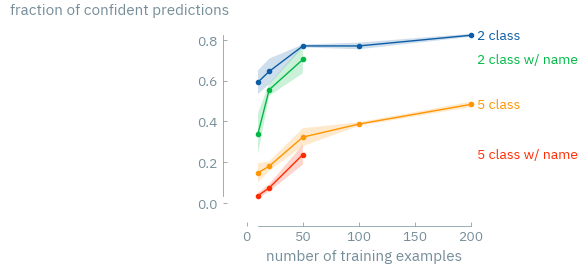

In [96]:
fig, ax = plt.subplots()

ax.plot(
    all_confident_res_grouped.loc[2, "SMILES, inchi, selfies", :]["frac_confident"]["mean"].index,
    all_confident_res_grouped.loc[2, "SMILES, inchi, selfies", :]["frac_confident"]["mean"].values,
    marker="o",
    label="2 class",
)

ax.fill_between(
    all_confident_res_grouped.loc[2, "SMILES, inchi, selfies", :]["frac_confident"]["mean"].index,
    all_confident_res_grouped.loc[2, "SMILES, inchi, selfies", :]["frac_confident"]["mean"].values
    - all_confident_res_grouped.loc[2, "SMILES, inchi, selfies", :]["frac_confident"]["sem"].values,
    all_confident_res_grouped.loc[2, "SMILES, inchi, selfies", :]["frac_confident"]["mean"].values
    + all_confident_res_grouped.loc[2, "SMILES, inchi, selfies", :]["frac_confident"]["sem"].values,
    alpha=0.2,
)

ax.plot(
    all_confident_res_grouped.loc[2, "name, SMILES, inchi, selfies", :]["frac_confident"][
        "mean"
    ].index,
    all_confident_res_grouped.loc[2, "name, SMILES, inchi, selfies", :]["frac_confident"][
        "mean"
    ].values,
    marker="o",
    label="2 class w/ name",
)

ax.fill_between(
    all_confident_res_grouped.loc[2, "name, SMILES, inchi, selfies", :]["frac_confident"][
        "mean"
    ].index,
    all_confident_res_grouped.loc[2, "name, SMILES, inchi, selfies", :]["frac_confident"][
        "mean"
    ].values
    - all_confident_res_grouped.loc[2, "name, SMILES, inchi, selfies", :]["frac_confident"][
        "sem"
    ].values,
    all_confident_res_grouped.loc[2, "name, SMILES, inchi, selfies", :]["frac_confident"][
        "mean"
    ].values
    + all_confident_res_grouped.loc[2, "name, SMILES, inchi, selfies", :]["frac_confident"][
        "sem"
    ].values,
    alpha=0.2,
)


ax.plot(
    all_confident_res_grouped.loc[5, "SMILES, inchi, selfies", :]["frac_confident"]["mean"].index,
    all_confident_res_grouped.loc[5, "SMILES, inchi, selfies", :]["frac_confident"]["mean"].values,
    marker="o",
    label="5 class",
)

ax.fill_between(
    all_confident_res_grouped.loc[5, "SMILES, inchi, selfies", :]["frac_confident"]["mean"].index,
    all_confident_res_grouped.loc[5, "SMILES, inchi, selfies", :]["frac_confident"]["mean"].values
    - all_confident_res_grouped.loc[5, "SMILES, inchi, selfies", :]["frac_confident"]["sem"].values,
    all_confident_res_grouped.loc[5, "SMILES, inchi, selfies", :]["frac_confident"]["mean"].values
    + all_confident_res_grouped.loc[5, "SMILES, inchi, selfies", :]["frac_confident"]["sem"].values,
    alpha=0.2,
)

ax.plot(
    all_confident_res_grouped.loc[5, "name, SMILES, inchi, selfies", :]["frac_confident"][
        "mean"
    ].index,
    all_confident_res_grouped.loc[5, "name, SMILES, inchi, selfies", :]["frac_confident"][
        "mean"
    ].values,
    marker="o",
    label="5 class w/ name",
)

ax.fill_between(
    all_confident_res_grouped.loc[5, "name, SMILES, inchi, selfies", :]["frac_confident"][
        "mean"
    ].index,
    all_confident_res_grouped.loc[5, "name, SMILES, inchi, selfies", :]["frac_confident"][
        "mean"
    ].values
    - all_confident_res_grouped.loc[5, "name, SMILES, inchi, selfies", :]["frac_confident"][
        "sem"
    ].values,
    all_confident_res_grouped.loc[5, "name, SMILES, inchi, selfies", :]["frac_confident"][
        "mean"
    ].values
    + all_confident_res_grouped.loc[5, "name, SMILES, inchi, selfies", :]["frac_confident"][
        "sem"
    ].values,
    alpha=0.2,
)

matplotx.line_labels(ax)

range_frame(
    ax,
    np.array([10, 200]),
    np.array(
        [
            all_confident_res_grouped["frac_confident"]["mean"].values.min(),
            all_confident_res_grouped["frac_confident"]["mean"].values.min(),
            all_confident_res_grouped["frac_confident"]["mean"].values.max(),
        ]
    ),
)

ax.set_xlabel("number of training examples")
ylabel_top("fraction of confident predictions")


fig.savefig("frac_confident.pdf", bbox_inches="tight")